In [50]:
import os, shutil

original_dataset_dir = './dataset/cats_and_dogs/train'

# base_dir = './dataset/cats_and_dogs_small'
# # os.mkdir(base_dir)

# train_dir = os.path.join(base_dir, 'train')
# # os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# # os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# # os.mkdir(test_dir)


# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

    
print('훈련용 고양이 이미지 개수: ', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 개수: ', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 개수: ', len(os.listdir(test_cats_dir)))
print('\n')
print('훈련용 강아지 이미지 개수: ', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 개수: ', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 개수: ', len(os.listdir(test_dogs_dir)))


훈련용 고양이 이미지 개수:  1000
검증용 고양이 이미지 개수:  500
테스트용 고양이 이미지 개수:  500


훈련용 강아지 이미지 개수:  1000
검증용 강아지 이미지 개수:  500
테스트용 강아지 이미지 개수:  500


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

In [60]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Epoch 1/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6922 - acc: 0.5190 - val_loss: 0.6857 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 30s 302ms/step - loss: 0.6685 - acc: 0.5845 - val_loss: 0.6269 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 30s 304ms/step - loss: 0.6237 - acc: 0.6520 - val_loss: 0.6262 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 30s 303ms/step - loss: 0.5742 - acc: 0.6980 - val_loss: 0.7802 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 31s 305ms/step - loss: 0.5423 - acc: 0.7250 - val_loss: 0.6118 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 31s 306ms/step - loss: 0.5107 - acc: 0.7470 - val_loss: 0.5099 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 31s 314ms/step - loss: 0.4817 - acc: 0.7620 - val_l

In [9]:
model.save('cats_and_dogs_small_1.h5')

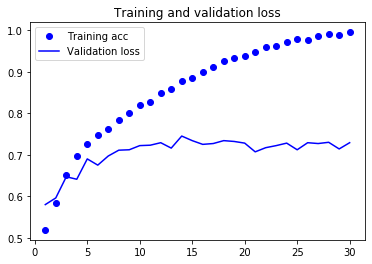

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

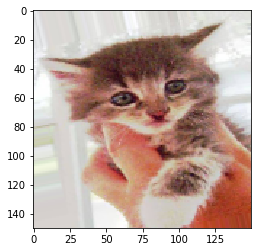

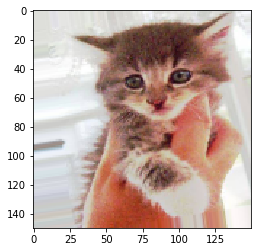

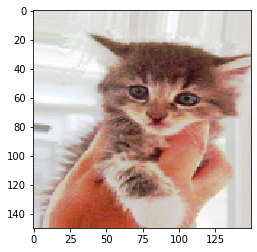

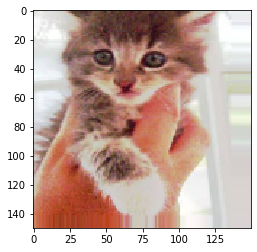

In [14]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'])

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 52s 517ms/step - loss: 0.6924 - acc: 0.5158 - val_loss: 0.7111 - val_acc: 0.5095
Epoch 2/100
100/100 [==============================] - 50s 496ms/step - loss: 0.6800 - acc: 0.5612 - val_loss: 0.6278 - val_acc: 0.6166
Epoch 3/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6614 - acc: 0.5934 - val_loss: 0.7032 - val_acc: 0.6060
Epoch 4/100
100/100 [==============================] - 53s 535ms/step - loss: 0.6501 - acc: 0.6040 - val_loss: 0.5622 - val_acc: 0.6746
Epoch 5/100
100/100 [==============================] - 53s 534ms/step - loss: 0.6311 - acc: 0.6354 - val_loss: 0.6467 - val_acc: 0.6821
Epoch 6/100
 99/100 [============================>.] - ETA: 0s - loss: 0.6200 - acc: 0.6516

KeyboardInterrupt: 

In [52]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')


In [20]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 67s 1us/step


In [22]:
import numpy as np

base_dir = './dataset/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 968us/step - loss: 0.6154 - acc: 0.6610 - val_loss: 0.4355 - val_acc: 0.8060
Epoch 2/30
2000/2000 [==============================] - 2s 813us/step - loss: 0.4315 - acc: 0.7965 - val_loss: 0.3519 - val_acc: 0.8540
Epoch 3/30
2000/2000 [==============================] - 2s 813us/step - loss: 0.3470 - acc: 0.8470 - val_loss: 0.3113 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 2s 812us/step - loss: 0.3035 - acc: 0.8770 - val_loss: 0.2892 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 2s 810us/step - loss: 0.2824 - acc: 0.8890 - val_loss: 0.2907 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 2s 864us/step - loss: 0.2613 - acc: 0.8955 - val_loss: 0.3023 - val_acc: 0.8640
Epoch 7/30
2000/2000 [==============================] - 2s 829us/step - loss: 0.2395 - acc: 0.9065 - val_loss: 0.2737 - val_acc: 0.8810


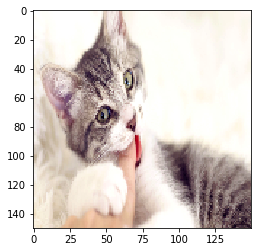

[0.00516588]
고양이




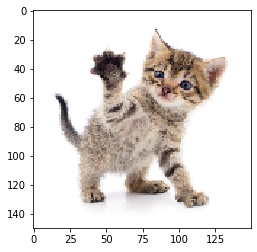

[0.03897858]
고양이




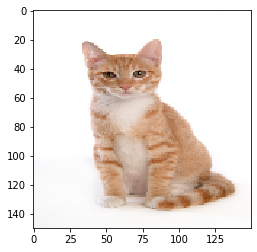

[0.01360683]
고양이




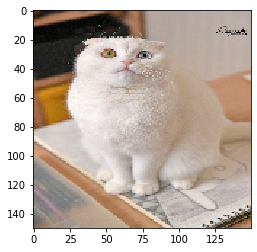

[0.03250265]
고양이




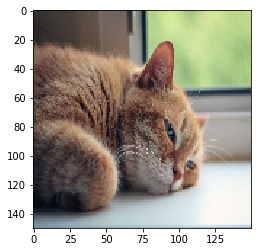

[0.15803047]
고양이




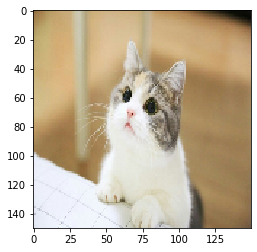

[0.03253752]
고양이




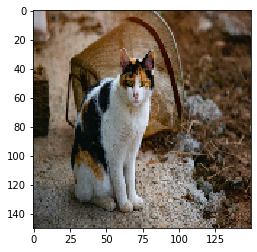

[0.8766584]
개




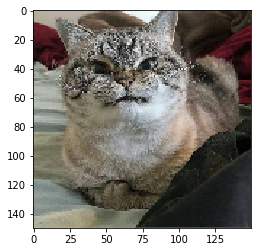

[0.0039043]
고양이




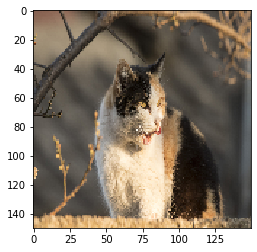

[0.5108721]
개




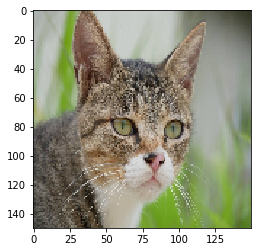

[0.01298325]
고양이




In [67]:

for i in range(0,10):
    img_path = './dataset/ex/cat/cat0000'+ str(i) + '.jpg'
        
    img = image.load_img(img_path, target_size = (150, 150))
        
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255.
    x = x.astype('float32')
        
    preds = model.predict(x)
    
    plt.imshow(x[0])
    plt.show()
    print(preds.flatten())
    print("개" if preds.flatten() > 0.5 else "고양이")
    print('\n')        

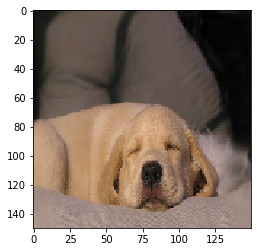

[0.41380256]
고양이




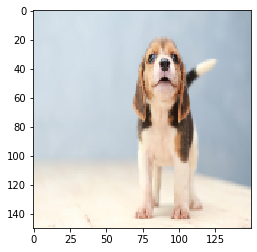

[0.8781548]
개




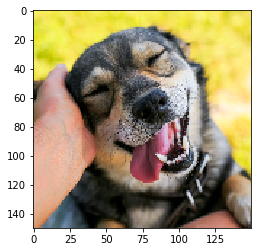

[0.85679376]
개




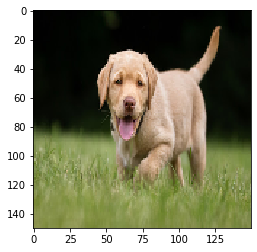

[0.9999484]
개




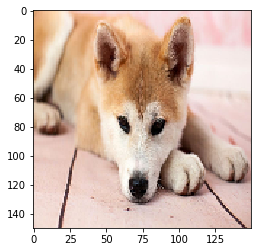

[0.98879576]
개




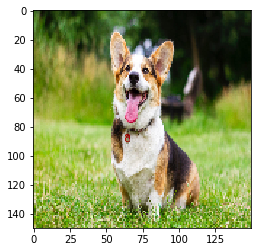

[0.9999999]
개




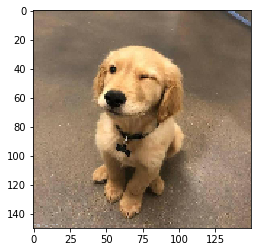

[0.99562377]
개




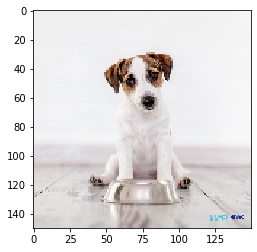

[0.193007]
고양이




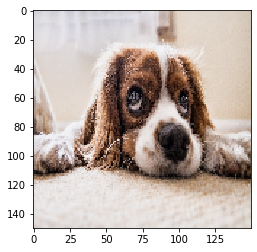

[0.5758386]
개




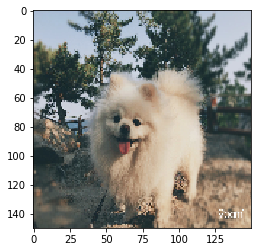

[0.58396393]
개




In [69]:
for i in range(0,10):
    img_path = './dataset/ex/dog/dog0000'+ str(i) + '.jpg'
        
    img = image.load_img(img_path, target_size = (150, 150))
        
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255.
        
    preds = model.predict(x)
    
    plt.imshow(x[0])
    plt.show()
    print(preds.flatten())
    print("개" if preds.flatten() > 0.5 else "고양이")
    print('\n')        

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

/Users/monireu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


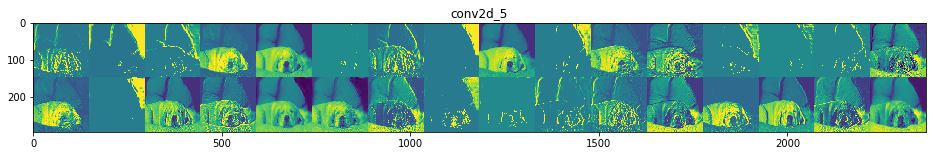

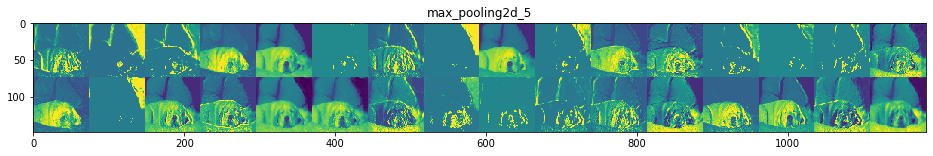

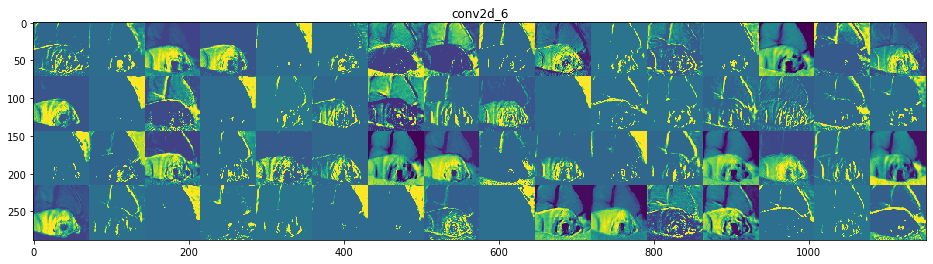

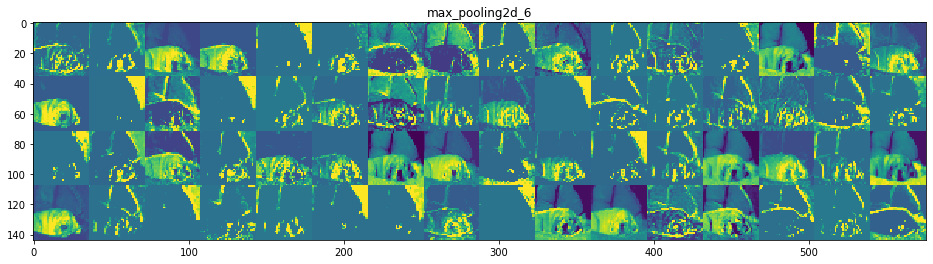

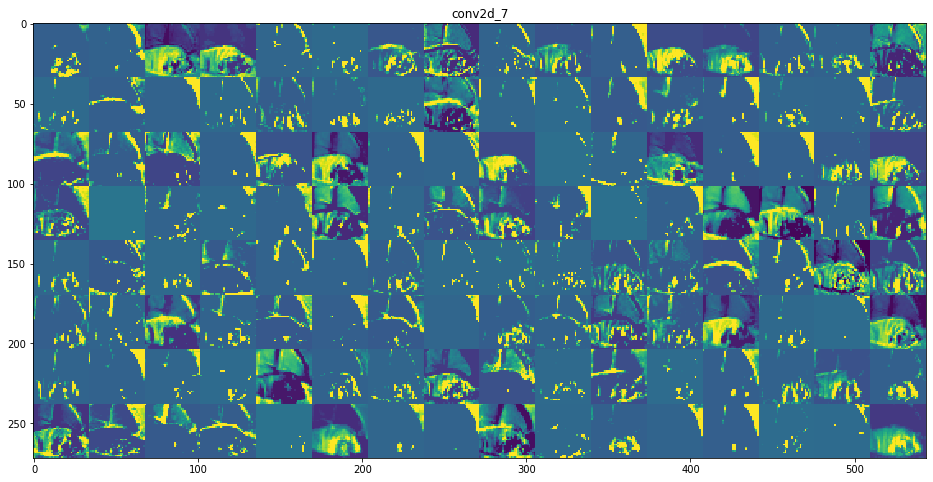

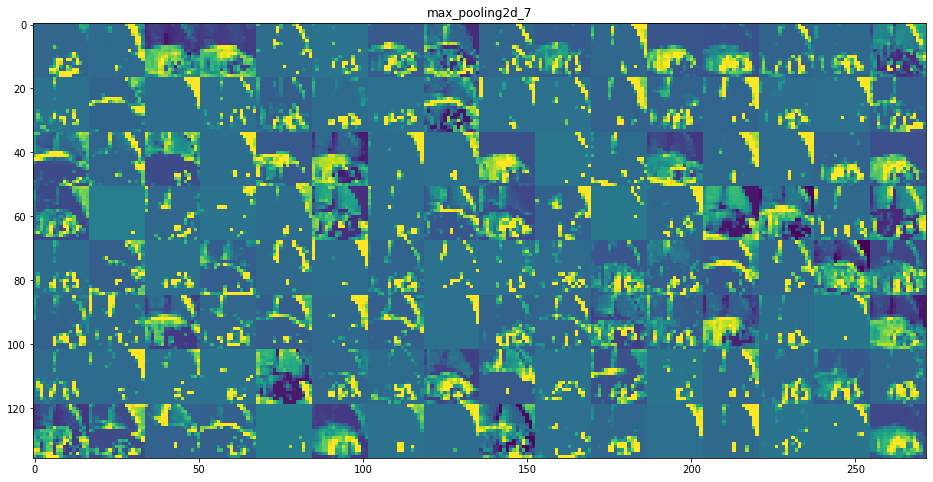

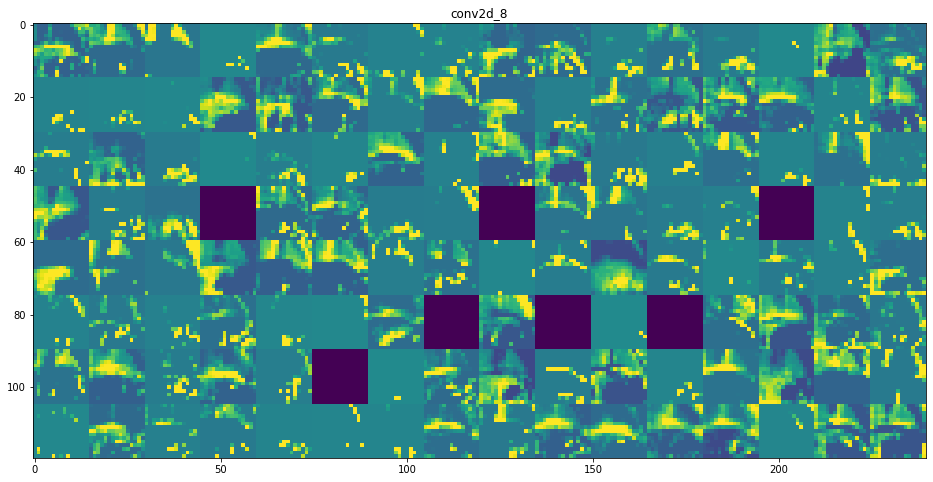

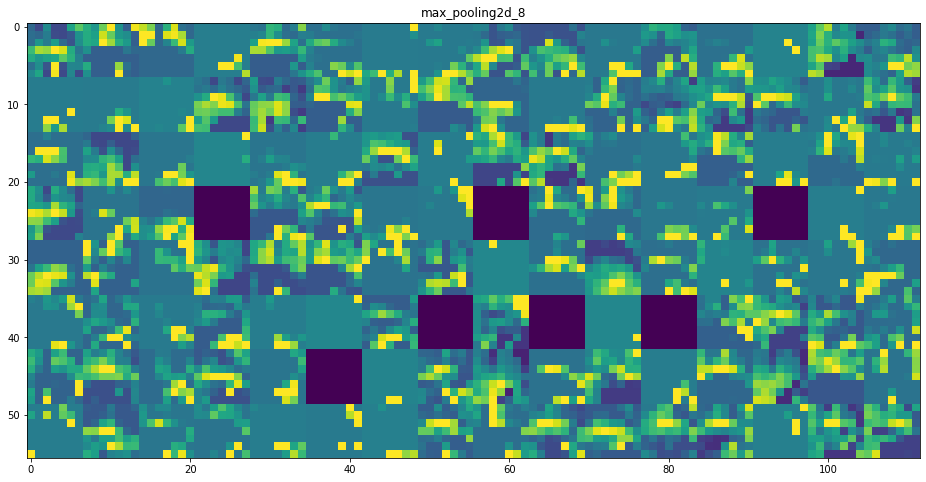

In [84]:
for i in range(0,1):
    img_path = './dataset/ex/dog/dog0000'+ str(i) + '.jpg'
        
    img = image.load_img(img_path, target_size = (150, 150))
        
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor /= 255.
        
#     plt.imshow(x[0])
#     plt.show()        

    layer_outputs = [layer.output for layer in model.layers[0:8]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    
    activations = activation_model.predict(img_tensor)
    
    layer_names = []
    for layer in model.layers[0:8]:
        layer_names.append(layer.name)
    
    images_per_row = 16
    
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        
        size = layer_activation.shape[1]
        
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
            
        scale = 1./size
        plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()